In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('port_calls_prod_60_8.csv', encoding= ' cp1252')
df2 = pd.read_csv('Ship9794850.csv')

In [3]:
df.head()

,ship_name,imo_number,mmsi,ship_status,ship_type,flag_name,entered,departed,latitude,longitude,speed,port_name,port_country_name,port_code,status,hours_in_port,gross_tonnage,length_overall_loa,draught,breadth
0,IL VAGABONDO,1001984,319574000.0,In Service/Commission,Yacht,Cayman Islands,2020-12-03T18:41:43Z,NaN,43.563351,7.078405,0.1,Juan-les-Pins,France,FRJLP,Moored,NaN,1143,61.27,3.29,10.98
1,IL VAGABONDO,1001984,319574000.0,In Service/Commission,Yacht,Cayman Islands,2020-12-03T14:40:15Z,2020-12-03T18:41:43Z,43.532131,7.123899,13.0,Antibes,France,FRANT,NaN,4.0,1143,61.27,3.29,10.98
2,IL VAGABONDO,1001984,319574000.0,In Service/Commission,Yacht,Cayman Islands,2019-09-30T08:38:49Z,2020-12-03T14:40:15Z,43.563324,7.078390,0.0,Juan-les-Pins,France,FRJLP,Moored,10326.0,1143,61.27,3.29,10.98
3,IL VAGABONDO,1001984,319574000.0,In Service/Commission,Yacht,Cayman Islands,2019-09-29T06:59:40Z,2019-09-30T08:38:49Z,43.528362,7.118890,15.0,Antibes,France,FRANT,NaN,25.7,1143,61.27,3.29,10.98
4,IL VAGABONDO,1001984,319574000.0,In Service/Commission,Yacht,Cayman Islands,2019-09-28T13:42:29Z,2019-09-29T06:59:40Z,43.730396,7.456732,0.1,Monaco,Monaco,MCMON,At anchor,17.3,1143,61.27,3.29,10.98


In [4]:
df2.head()

,timestamp,mmsi,latitude,longitude,speed,course,heading,draught,destination,status,collection_type
0,2022-10-10 01:34:21.8 UTC,636018764,19.980405,119.877287,13.5,223,219,8.5,JPKSM > AEFJR,15,dynamic
1,2022-10-10 02:09:01 UTC,636018764,19.885000,119.785000,13.0,222,219,8.5,JPKSM > AEFJR,0,satellite
2,2022-10-10 02:12:01 UTC,636018764,19.876667,119.778333,13.0,221,219,8.5,JPKSM > AEFJR,0,satellite
3,2022-10-10 02:41:36.55 UTC,636018764,19.798242,119.700982,13.1,223,225,8.5,JPKSM > AEFJR,15,dynamic
4,2022-10-10 02:52:16.27 UTC,636018764,19.770292,119.673700,12.6,224,225,8.5,JPKSM > AEFJR,15,dynamic


In [5]:
df.isnull().sum()

ship_name                   0
imo_number                  0
mmsi                    12078
ship_status                 0
ship_type                   0
flag_name                   0
entered                     0
departed                 2142
latitude                    0
longitude                   0
speed                 1167131
port_name                   0
port_country_name           0
port_code                   0
status                1143713
hours_in_port            2142
gross_tonnage               0
length_overall_loa          0
draught                     0
breadth                     0
dtype: int64

In [42]:
df['status'].value_counts()

IHS                            1166145
Moored                          340520
At anchor                       258646
Under way sailing                 9919
Restricted manoeuverability       7729
Constrained by her draught        6042
Not under command                 4146
Not defined                       3648
Reserved                           482
Engaged in fishing                 295
Aground                            161
Reserved for WIG                    33
Reserved for HSC                    17
Name: status, dtype: int64

In [43]:
df.hours_in_port.describe()

count    2.939354e+06
mean     2.885239e+01
std      1.053171e+02
min     -7.762800e+03
25%      4.100000e+00
50%      1.100000e+01
75%      2.810000e+01
max      2.286140e+04
Name: hours_in_port, dtype: float64

In [6]:
df.describe()

,imo_number,mmsi,latitude,longitude,speed,hours_in_port,gross_tonnage,length_overall_loa,draught,breadth
count,2.941496e+06,2.929418e+06,2.941496e+06,2.941496e+06,1.774365e+06,2.939354e+06,2.941496e+06,2.941496e+06,2.941496e+06,2.941496e+06
mean,9.401637e+06,4.243636e+08,2.800831e+01,3.549785e+01,5.257617e+00,2.885239e+01,3.834638e+04,1.972992e+02,1.082371e+01,2.996526e+01
std,3.828121e+05,1.549212e+08,2.127797e+01,7.302316e+01,5.504000e+00,1.053171e+02,4.023909e+04,7.757210e+01,3.701561e+00,1.091222e+01
min,1.001984e+06,2.050820e+08,-5.608052e+01,-1.765236e+02,0.000000e+00,-7.762800e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.980000e+00
25%,9.294408e+06,2.558064e+08,1.293186e+01,8.364072e-01,0.000000e+00,4.100000e+00,9.924000e+03,1.410000e+02,8.200000e+00,2.250000e+01
50%,9.407419e+06,4.415670e+08,3.139425e+01,2.889313e+01,3.600000e+00,1.100000e+01,2.682700e+04,1.833100e+02,1.100000e+01,3.000000e+01
75%,9.619452e+06,5.634060e+08,4.224537e+01,1.039524e+02,1.000000e+01,2.810000e+01,4.954900e+04,2.489600e+02,1.350000e+01,3.280000e+01
max,9.953016e+06,7.600021e+08,7.899817e+01,1.794478e+02,9.840000e+01,2.286140e+04,2.365830e+05,4.000000e+02,2.303500e+01,1.054000e+02


In [7]:
df.hours_in_port.mean()

28.852387735536446

### We have got the mean of hours in port 28.85 hours; however, we have noticed above that we have some values in negative as well so we have two options either we will try to fix it or we will exclude it. Let's try both the methods. 

Excluding the negative values

In [8]:
df_hours_exclude_negative = df[df['hours_in_port'] >= 0]
df_hours_exclude_negative.describe()

,imo_number,mmsi,latitude,longitude,speed,hours_in_port,gross_tonnage,length_overall_loa,draught,breadth
count,2.904458e+06,2.892479e+06,2.904458e+06,2.904458e+06,1.743632e+06,2.904458e+06,2.904458e+06,2.904458e+06,2.904458e+06,2.904458e+06
mean,9.401600e+06,4.243960e+08,2.801206e+01,3.555662e+01,5.297079e+00,2.957912e+01,3.835308e+04,1.973160e+02,1.082393e+01,2.996611e+01
std,3.824388e+05,1.549600e+08,2.128493e+01,7.299674e+01,5.505348e+00,1.049795e+02,4.025099e+04,7.757302e+01,3.701742e+00,1.091394e+01
min,1.001984e+06,2.050820e+08,-5.608052e+01,-1.765236e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.980000e+00
25%,9.294408e+06,2.558064e+08,1.294066e+01,8.828760e-01,1.000000e-01,4.100000e+00,9.924000e+03,1.410000e+02,8.200000e+00,2.250000e+01
50%,9.407419e+06,4.415670e+08,3.139858e+01,2.889398e+01,3.800000e+00,1.140000e+01,2.680900e+04,1.833100e+02,1.100000e+01,3.000000e+01
75%,9.619440e+06,5.634070e+08,4.224621e+01,1.039536e+02,1.000000e+01,2.840000e+01,4.954900e+04,2.489600e+02,1.350000e+01,3.280000e+01
max,9.953016e+06,7.600021e+08,7.899817e+01,1.794478e+02,9.840000e+01,2.286140e+04,2.365830e+05,4.000000e+02,2.303500e+01,1.054000e+02


In [9]:
df_hours_exclude_negative.hours_in_port.mean()

29.579118720256915

In [10]:
(len(df[df['hours_in_port'] <= 0]) / len(df))* 100

2.0232561934471436

We will re-evaluate again by trying fixing it. Noticing that the hours are getting calulated by (departed-entered), assuming that some of the enteries were recorded in the wrong order(departed insted of entered and vice versa) so for them we will do (entered-departed).

Ideal scenerio should be dropping the values if they are not correct as it is just 2% of our data. However, we will still try to see how are these values will impact our mean if we try fixing it

In [11]:
df_hours_exclude_negative.columns

Index(['ship_name', 'imo_number', 'mmsi', 'ship_status', 'ship_type',
       'flag_name', 'entered', 'departed', 'latitude', 'longitude', 'speed',
       'port_name', 'port_country_name', 'port_code', 'status',
       'hours_in_port', 'gross_tonnage', 'length_overall_loa', 'draught',
       'breadth'],
      dtype='object')

We have 

In [12]:
df.port_name.value_counts()[:10]

Singapore Offshore Terminals    75574
Tanjong Pagar                   34613
Antwerp                         27369
Hook of Holland                 25910
Pulau Sebarok                   24058
Nipah                           23706
Shanghai                        23514
Telok Ramunia                   22846
Hong Kong                       21920
Tanjung Langsat                 21752
Name: port_name, dtype: int64

<Axes: >

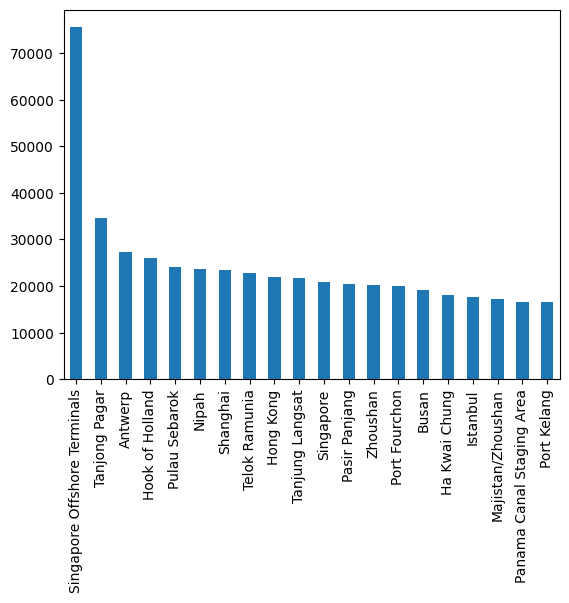

In [13]:
df.port_name.value_counts()[:20].plot(kind='bar', x='port_name')

We can see that the from the bar chart the most visited port is Singapore Offshore Terminals.

In [14]:
us_ports = df[df['port_country_name'] == 'United States of America'].groupby('port_country_name')['hours_in_port'].agg(['mean', 'max', 'min'])

# Print the results
us_ports

,mean,max,min
port_country_name,,,
United States of America,36.211294,15582.2,-7762.8


# Removing Outliers

### Z-Score

In [15]:
def remove_outliers_zscore(df, col_name, threshold=3):
    mean = df[col_name].mean()
    std = df[col_name].std()
    df['z_score'] = (df[col_name] - mean) / std
    return df[df['z_score'].abs() <= threshold].drop('z_score', axis=1)

In [16]:
df_z_score = remove_outliers_zscore(df, 'hours_in_port')


In [17]:
print(100 - ((len(df_z_score)/len(df))*100),'% of values removed from the data')
print(len(df) - len(df_z_score), 'values were removed')

0.7781074664048475 % of values removed from the data
22888 values were removed


### Interquartile Range (IQR) Method:


In [18]:
def remove_outliers_iqr(df, col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col_name] >= lower) & (df[col_name] <= upper)]

In [19]:
df_iqr = remove_outliers_iqr(df_hours_exclude_negative, 'hours_in_port')


In [20]:
print(100 - ((len(df_iqr)/len(df))*100),'% of values removed from the data')
print(len(df) - len(df_iqr), 'values were removed')

10.730866198696177 % of values removed from the data
315648 values were removed


In [22]:
df.latitude

0          43.563351
1          43.532131
2          43.563324
3          43.528362
4          43.730396
             ...    
2941491    29.939243
2941492    30.007483
2941493    29.940598
2941494    21.700000
2941495    21.700000
Name: latitude, Length: 2941496, dtype: float64

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Define the map boundaries
lllon = -180 # lower left longitude
lllat = -60  # lower left latitude
urlon = 180 # upper right longitude
urlat = 80  # upper right latitude

# Create a new map
m = Basemap(projection='cyl', resolution='c',
            llcrnrlon=lllon, llcrnrlat=lllat,
            urcrnrlon=urlon, urcrnrlat=urlat)

# Add some features to the map
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.fillcontinents(color='lightgray', lake_color='white')
m.drawmapboundary(fill_color='white')

# Plot the port locations
lats = df.latitude.to_numpy() 
lons = df.longitude.to_numpy()
x, y = m(lons, lats)
m.plot(x, y, 'bo', markersize=1)

# Show the map
plt.show()


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [24]:
# Group port calls by ship_type and count the number of entries
port_calls_by_ship_type = df.groupby('ship_type')['imo_number'].count()

# Print the result
pd.DataFrame(port_calls_by_ship_type)


,imo_number
ship_type,
Aggregates Carrier,1068
Air Cushion Vehicle Passenger,853
Anchor Handling Vessel,1378
Asphalt/Bitumen Tanker,6280
Bulk Carrier,369664
...,...
Vehicles Carrier,48533
Water Injection Dredger,219
Well Stimulation Vessel,960


In [25]:
df_iqr

,ship_name,imo_number,mmsi,ship_status,ship_type,flag_name,entered,departed,latitude,longitude,speed,port_name,port_country_name,port_code,status,hours_in_port,gross_tonnage,length_overall_loa,draught,breadth
1,IL VAGABONDO,1001984,319574000.0,In Service/Commission,Yacht,Cayman Islands,2020-12-03T14:40:15Z,2020-12-03T18:41:43Z,43.532131,7.123899,13.0,Antibes,France,FRANT,NaN,4.0,1143,61.27,3.29,10.98
3,IL VAGABONDO,1001984,319574000.0,In Service/Commission,Yacht,Cayman Islands,2019-09-29T06:59:40Z,2019-09-30T08:38:49Z,43.528362,7.118890,15.0,Antibes,France,FRANT,NaN,25.7,1143,61.27,3.29,10.98
4,IL VAGABONDO,1001984,319574000.0,In Service/Commission,Yacht,Cayman Islands,2019-09-28T13:42:29Z,2019-09-29T06:59:40Z,43.730396,7.456732,0.1,Monaco,Monaco,MCMON,At anchor,17.3,1143,61.27,3.29,10.98
5,IL VAGABONDO,1001984,319574000.0,In Service/Commission,Yacht,Cayman Islands,2019-09-28T12:57:32Z,2019-09-28T17:59:40Z,43.736800,7.431200,NaN,Monte-Carlo,Monaco,MCMCM,IHS,5.0,1143,61.27,3.29,10.98
6,IL VAGABONDO,1001984,319574000.0,In Service/Commission,Yacht,Cayman Islands,2019-09-27T09:25:53Z,2019-09-28T12:57:32Z,43.731758,7.457350,0.1,Monaco,Monaco,MCMON,NaN,27.5,1143,61.27,3.29,10.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941491,YI CHENG 18,9953016,413286590.0,In Service/Commission,Products Tanker,"China, People's Republic Of",2021-10-05T17:42:08Z,2021-10-06T05:59:03Z,29.939243,122.205666,0.0,Zhoushan,China,CNZOS,At anchor,12.3,8187,138.38,7.80,19.00
2941492,YI CHENG 18,9953016,413286590.0,In Service/Commission,Products Tanker,"China, People's Republic Of",2021-10-05T13:41:41Z,2021-10-06T04:21:11Z,30.007483,122.099517,NaN,Majistan/Zhoushan,China,CNMAJ,IHS,14.7,8187,138.38,7.80,19.00
2941493,YI CHENG 18,9953016,413286590.0,In Service/Commission,Products Tanker,"China, People's Republic Of",2021-10-05T13:41:06Z,2021-10-05T13:41:41Z,29.940598,122.202324,0.4,Zhoushan,China,CNZOS,NaN,0.0,8187,138.38,7.80,19.00
2941494,YI CHENG 18,9953016,413286590.0,In Service/Commission,Products Tanker,"China, People's Republic Of",2021-09-30T13:21:39Z,2021-10-02T00:41:30Z,21.700000,108.600000,NaN,Qinzhou,China,CNQZH,IHS,35.3,8187,138.38,7.80,19.00


In [41]:
df['ship_type'].isnull().sum()

0

In [61]:
df_iqr.columns

Index(['ship_name', 'imo_number', 'mmsi', 'ship_status', 'ship_type',
       'flag_name', 'entered', 'departed', 'latitude', 'longitude', 'speed',
       'port_name', 'port_country_name', 'port_code', 'status',
       'hours_in_port', 'gross_tonnage', 'length_overall_loa', 'draught',
       'breadth'],
      dtype='object')

In [82]:
drop_df =  df_iqr.drop(['ship_name', 'speed','mmsi',
       'port_name', 'port_country_name', 'status'], axis=1)


In [83]:
drop_df.head()

,imo_number,ship_status,ship_type,flag_name,entered,departed,latitude,longitude,port_code,hours_in_port,gross_tonnage,length_overall_loa,draught,breadth
1,1001984,In Service/Commission,Yacht,Cayman Islands,2020-12-03T14:40:15Z,2020-12-03T18:41:43Z,43.532131,7.123899,FRANT,4.0,1143,61.27,3.29,10.98
3,1001984,In Service/Commission,Yacht,Cayman Islands,2019-09-29T06:59:40Z,2019-09-30T08:38:49Z,43.528362,7.118890,FRANT,25.7,1143,61.27,3.29,10.98
4,1001984,In Service/Commission,Yacht,Cayman Islands,2019-09-28T13:42:29Z,2019-09-29T06:59:40Z,43.730396,7.456732,MCMON,17.3,1143,61.27,3.29,10.98
5,1001984,In Service/Commission,Yacht,Cayman Islands,2019-09-28T12:57:32Z,2019-09-28T17:59:40Z,43.736800,7.431200,MCMCM,5.0,1143,61.27,3.29,10.98
6,1001984,In Service/Commission,Yacht,Cayman Islands,2019-09-27T09:25:53Z,2019-09-28T12:57:32Z,43.731758,7.457350,MCMON,27.5,1143,61.27,3.29,10.98


In [84]:
from sklearn.feature_extraction import FeatureHasher
import pandas as pd

# Define the columns to encode
cat_cols = ['ship_status',  'ship_type', 'flag_name', 'port_code' ]

target_col = 'hours_in_port'

# Define the regularization parameter
alpha = 5

# Encode the categorical columns using target encoding
for col in cat_cols:
    target_mean = drop_df.groupby(col)[target_col].mean()
    nrows = drop_df.groupby(col)[target_col].count()
    smooth_mean = (nrows * target_mean + alpha * drop_df[target_col].mean()) / (nrows + alpha)
    drop_df[col] = drop_df[col].map(smooth_mean)

# Show the encoded dataset
drop_df


,imo_number,ship_status,ship_type,flag_name,entered,departed,latitude,longitude,port_code,hours_in_port,gross_tonnage,length_overall_loa,draught,breadth
1,1001984,14.716175,14.023123,14.868933,2020-12-03T14:40:15Z,2020-12-03T18:41:43Z,43.532131,7.123899,6.448383,4.0,1143,61.27,3.29,10.98
3,1001984,14.716175,14.023123,14.868933,2019-09-29T06:59:40Z,2019-09-30T08:38:49Z,43.528362,7.118890,6.448383,25.7,1143,61.27,3.29,10.98
4,1001984,14.716175,14.023123,14.868933,2019-09-28T13:42:29Z,2019-09-29T06:59:40Z,43.730396,7.456732,10.278576,17.3,1143,61.27,3.29,10.98
5,1001984,14.716175,14.023123,14.868933,2019-09-28T12:57:32Z,2019-09-28T17:59:40Z,43.736800,7.431200,11.399052,5.0,1143,61.27,3.29,10.98
6,1001984,14.716175,14.023123,14.868933,2019-09-27T09:25:53Z,2019-09-28T12:57:32Z,43.731758,7.457350,10.278576,27.5,1143,61.27,3.29,10.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941491,9953016,14.716175,13.694463,14.151596,2021-10-05T17:42:08Z,2021-10-06T05:59:03Z,29.939243,122.205666,9.943775,12.3,8187,138.38,7.80,19.00
2941492,9953016,14.716175,13.694463,14.151596,2021-10-05T13:41:41Z,2021-10-06T04:21:11Z,30.007483,122.099517,16.422528,14.7,8187,138.38,7.80,19.00
2941493,9953016,14.716175,13.694463,14.151596,2021-10-05T13:41:06Z,2021-10-05T13:41:41Z,29.940598,122.202324,9.943775,0.0,8187,138.38,7.80,19.00
2941494,9953016,14.716175,13.694463,14.151596,2021-09-30T13:21:39Z,2021-10-02T00:41:30Z,21.700000,108.600000,21.795786,35.3,8187,138.38,7.80,19.00


In [93]:
y_df = drop_df.hours_in_port
X_df = drop_df.drop(['hours_in_port'], axis =1)
X_df

,imo_number,ship_status,ship_type,flag_name,entered,departed,latitude,longitude,port_code,gross_tonnage,length_overall_loa,draught,breadth
1,1001984,14.716175,14.023123,14.868933,2020-12-03T14:40:15Z,2020-12-03T18:41:43Z,43.532131,7.123899,6.448383,1143,61.27,3.29,10.98
3,1001984,14.716175,14.023123,14.868933,2019-09-29T06:59:40Z,2019-09-30T08:38:49Z,43.528362,7.118890,6.448383,1143,61.27,3.29,10.98
4,1001984,14.716175,14.023123,14.868933,2019-09-28T13:42:29Z,2019-09-29T06:59:40Z,43.730396,7.456732,10.278576,1143,61.27,3.29,10.98
5,1001984,14.716175,14.023123,14.868933,2019-09-28T12:57:32Z,2019-09-28T17:59:40Z,43.736800,7.431200,11.399052,1143,61.27,3.29,10.98
6,1001984,14.716175,14.023123,14.868933,2019-09-27T09:25:53Z,2019-09-28T12:57:32Z,43.731758,7.457350,10.278576,1143,61.27,3.29,10.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941491,9953016,14.716175,13.694463,14.151596,2021-10-05T17:42:08Z,2021-10-06T05:59:03Z,29.939243,122.205666,9.943775,8187,138.38,7.80,19.00
2941492,9953016,14.716175,13.694463,14.151596,2021-10-05T13:41:41Z,2021-10-06T04:21:11Z,30.007483,122.099517,16.422528,8187,138.38,7.80,19.00
2941493,9953016,14.716175,13.694463,14.151596,2021-10-05T13:41:06Z,2021-10-05T13:41:41Z,29.940598,122.202324,9.943775,8187,138.38,7.80,19.00
2941494,9953016,14.716175,13.694463,14.151596,2021-09-30T13:21:39Z,2021-10-02T00:41:30Z,21.700000,108.600000,21.795786,8187,138.38,7.80,19.00


In [95]:
pd.to_datetime(X_df['entered'])

1          2020-12-03 14:40:15+00:00
3          2019-09-29 06:59:40+00:00
4          2019-09-28 13:42:29+00:00
5          2019-09-28 12:57:32+00:00
6          2019-09-27 09:25:53+00:00
                     ...            
2941491    2021-10-05 17:42:08+00:00
2941492    2021-10-05 13:41:41+00:00
2941493    2021-10-05 13:41:06+00:00
2941494    2021-09-30 13:21:39+00:00
2941495    2021-09-29 21:21:09+00:00
Name: entered, Length: 2625848, dtype: object

In [92]:
X_df

,imo_number,ship_status,ship_type,flag_name,entered,departed,latitude,longitude,port_code,gross_tonnage,length_overall_loa,draught,breadth,unix_timestamp
1,1001984,14.716175,14.023123,14.868933,2020-12-03 14:40:15+00:00,2020-12-03T18:41:43Z,43.532131,7.123899,6.448383,1143,61.27,3.29,10.98,1607006415
3,1001984,14.716175,14.023123,14.868933,2019-09-29 06:59:40+00:00,2019-09-30T08:38:49Z,43.528362,7.118890,6.448383,1143,61.27,3.29,10.98,1569740380
4,1001984,14.716175,14.023123,14.868933,2019-09-28 13:42:29+00:00,2019-09-29T06:59:40Z,43.730396,7.456732,10.278576,1143,61.27,3.29,10.98,1569678149
5,1001984,14.716175,14.023123,14.868933,2019-09-28 12:57:32+00:00,2019-09-28T17:59:40Z,43.736800,7.431200,11.399052,1143,61.27,3.29,10.98,1569675452
6,1001984,14.716175,14.023123,14.868933,2019-09-27 09:25:53+00:00,2019-09-28T12:57:32Z,43.731758,7.457350,10.278576,1143,61.27,3.29,10.98,1569576353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941491,9953016,14.716175,13.694463,14.151596,2021-10-05 17:42:08+00:00,2021-10-06T05:59:03Z,29.939243,122.205666,9.943775,8187,138.38,7.80,19.00,1633455728
2941492,9953016,14.716175,13.694463,14.151596,2021-10-05 13:41:41+00:00,2021-10-06T04:21:11Z,30.007483,122.099517,16.422528,8187,138.38,7.80,19.00,1633441301
2941493,9953016,14.716175,13.694463,14.151596,2021-10-05 13:41:06+00:00,2021-10-05T13:41:41Z,29.940598,122.202324,9.943775,8187,138.38,7.80,19.00,1633441266
2941494,9953016,14.716175,13.694463,14.151596,2021-09-30 13:21:39+00:00,2021-10-02T00:41:30Z,21.700000,108.600000,21.795786,8187,138.38,7.80,19.00,1633008099


In [69]:
X_df.isnull().sum()

imo_number            0
ship_status           0
ship_type             0
flag_name             0
entered               0
departed              0
latitude              0
longitude             0
port_code             0
gross_tonnage         0
length_overall_loa    0
draught               0
breadth               0
dtype: int64

In [81]:
len(df.port_code.unique())

5107

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df.to_numpy(), y_df.to_numpy(), test_size=0.20, random_state=42)

In [71]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (2100678, 13)
X_test shape:  (525170, 13)
y_train shape:  (2100678,)
y_test shape:  (525170,)


In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create a Random Forest Regressor object
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error: {:.2f}".format(mse))

ValueError: could not convert string to float: '2021-09-28T15:02:17Z'